In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os 

In [106]:

repo_name = 'Fed_IT_Employment'
# get root dir which ends in folder_name
root = os.getcwd()
while os.path.basename(root) != repo_name:
    root = os.path.dirname(root)
root


'/Users/coltonlapp/Dropbox/My Mac (Coltons-MacBook-Pro.local)/Desktop/Work/USDC/publicwork/Fed_IT_Employment'

In [107]:
rdir = os.path.join( root, 'data', 'raw_data')
rdir


'/Users/coltonlapp/Dropbox/My Mac (Coltons-MacBook-Pro.local)/Desktop/Work/USDC/publicwork/Fed_IT_Employment/data/raw_data'

In [108]:
years_sep = [str(y) for y in range(1998, 2024)]
years_quart = [str(y) for y in range(2010, 2024)]


file_info = {

    'quarter_file_info': [
         { 'month':'MAR', 'years':years_quart},
         { 'month':'JUN', 'years':years_quart},
         { 'month':'SEP', 'years':years_sep},
         { 'month':'DEC', 'years':years_quart}
         ],

    'filenames' : {
        'fedscope_folder' : 'FedScope_{}{}',
        'emp_data' : 'FACTDATA_{month}{year}.TXT',
        'age_codebook' : 'DTagelvl.txt'
        }   
}



In [109]:
# Create mapping of column names to their descriptions

colname_map = {
    'AGYSUB' : 'agency',
    'LOC' : 'location',
    'AGELVL' : 'age',
    'EDLVL' : 'ed_level',
    'GSEGRD' : 'gen_sched_eq_grade',
    'LOSLVL' : 'length_of_service',
    'OCC' : 'occupation',
    'PATCO' : 'occupation_category',
    'PPGRD' : 'pay_plan_grade',
    'SALLVL' : 'salary_level',
    'STEMOCC' : 'stem_occ',
    'SUPERVIS' : 'supervisory_status',
    'TOA' : 'type_of_appointment',
    'WORKSCH' : 'work_schedule',
    'WORKSTAT' : 'work_status',
    'DATECODE' : 'date',
    'EMPLOYMENT' : 'employment',
    'SALARY' : 'avg_salary',
    'LOS' : 'avg_length_of_service'
}

# IT series
IT_series = [
    '2210' # IT Management
    #,'1515' # OR
    #,'1550' # Comp Sci
    #,'1520' # Math
    #,'1560' # Data Science
]

def map_age(df, folder):
    age_codebook = pd.read_csv(os.path.join( rdir, folder, file_info['filenames']['age_codebook']))
    
    # turn age_codebook df into a dictionary mapping  column AGELVL to column AGELVLT
    age_dict = dict(zip(age_codebook['AGELVL'], age_codebook['AGELVLT']))

    # map AGELVL to AGELVLT
    df['age'] = df['age'].map(age_dict)
    return df

def map_date(df):
    # convert date to datetime with format YYYYMM
    df['date'] = pd.to_datetime(df['date'], format='%Y%m')

    # return
    return df

In [110]:
cols_keep = ['agency', 'location', 'age', 'ed_level', 'occupation', 'occupation_category', 'pay_plan_grade', 'date']

concat_df = pd.DataFrame()
for my_dict in file_info['quarter_file_info']:
    
    for year in my_dict['years']:
        folder = file_info['filenames']['fedscope_folder'].format(my_dict['month'].title(), year)
        fname = file_info['filenames']['emp_data'].format(month=my_dict['month'], year=year)
        print(fname)
        df = pd.read_csv(os.path.join(rdir, folder, fname))

        # rename df
        df.rename(columns=colname_map, inplace=True)
        
        # subset 
        df = df[cols_keep]

        #df = map_age(df, folder)
        #df = map_date(df)

        # concat df to concat_df
        concat_df = pd.concat([concat_df, df], axis=0)


concat_df 

FACTDATA_MAR2010.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (1,3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2011.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2012.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2013.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2014.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2015.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2016.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2017.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2018.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2019.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2020.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2021.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2022.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_MAR2023.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2010.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2011.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2012.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2013.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2014.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2015.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2016.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2017.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2018.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2019.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2020.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2021.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2022.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_JUN2023.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP1998.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP1999.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2000.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2001.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2002.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2003.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2004.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2005.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2006.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2007.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2008.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2009.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2010.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2011.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2012.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2013.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2014.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2015.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2016.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2017.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2018.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2019.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2020.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2021.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2022.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_SEP2023.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (1,3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2010.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2011.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2012.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2013.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2014.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2015.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2016.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2017.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2018.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2019.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2020.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2021.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2022.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


FACTDATA_DEC2023.TXT


/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3001392866.py:10: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(rdir, folder, fname))


,agency,location,age,ed_level,occupation,occupation_category,pay_plan_grade,date
0,AA00,11,K,21.0,301,2,EX-02,201003
1,AB00,IT,J,7.0,1630,2,GS-12,201003
2,AB00,FR,H,4.0,1630,2,GS-12,201003
3,AB00,BE,J,4.0,1630,2,GS-12,201003
4,AB00,FR,I,17.0,301,2,GS-15,201003
...,...,...,...,...,...,...,...,...
2261277,ZS00,11,D,4.0,301,2,AD-00,202312
2261278,ZS00,11,C,13.0,301,2,AD-00,202312
2261279,ZS00,11,D,4.0,301,2,AD-00,202312
2261280,ZS00,51,E,17.0,301,2,AD-00,202312


In [112]:
concat_df.to_csv(os.path.join(root, 'data', 'processed_data', 'all_rows_concat.csv'), index=False)

## Age Distribution for Dec 2023 Employment Data 
### IT vs All Federal 

/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3955184545.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].map(age_dict)


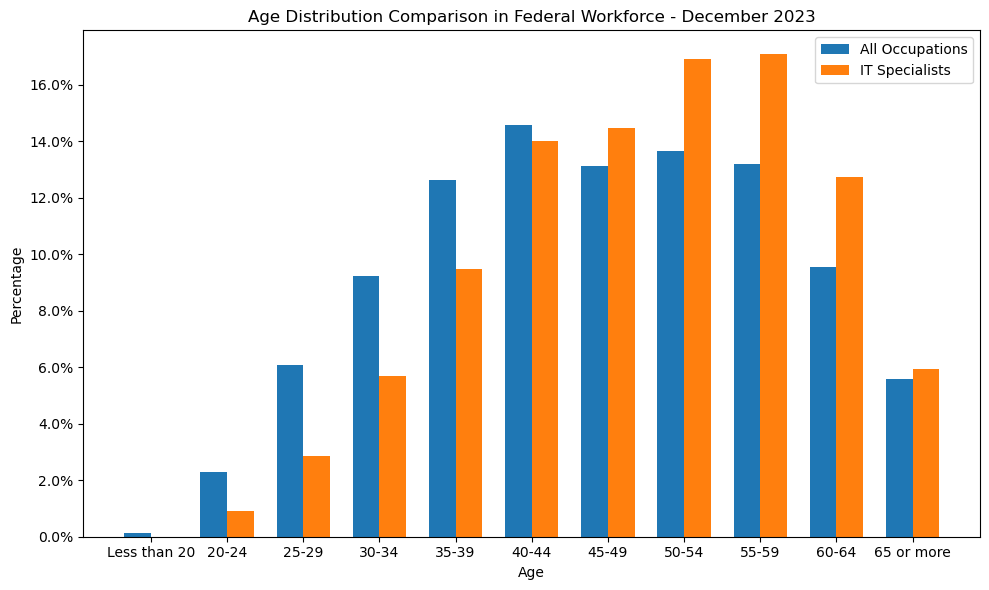

,agency,location,age,ed_level,occupation,occupation_category,pay_plan_grade,date
0,AA00,11,40-44,13,0340,2,ES-**,202312
1,AA00,11,55-59,15,0905,1,ES-**,202312
2,AA00,11,65 or more,04,0301,2,EX-02,202312
3,AA00,11,25-29,04,0560,2,GS-12,202312
4,AA00,11,30-34,04,0905,1,GS-13,202312


In [128]:
# Create 12/1/2023 as datetime
df_2023 = concat_df[concat_df['date'] == 202312]

df_2023 = map_age(df_2023, file_info['filenames']['fedscope_folder'].format(my_dict['month'].title(), year) )

# cateogrical order of ages
ages = ['Less than 20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65 or more']



# Calculate value counts as percentages
age_counts_all = df_2023['age'].value_counts(normalize=True).loc[ages] * 100

df_IT = df_2023[df_2023['occupation'].isin(IT_series)]
age_counts_IT = df_IT['age'].value_counts(normalize=True).loc[ages] * 100

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for the bars
bar_width = 0.35
index = range(len(ages))

# Plot the bars
bars_all = ax.bar(index, age_counts_all, bar_width, label='All Occupations')
bars_IT = ax.bar([i + bar_width for i in index], age_counts_IT, bar_width, label='IT Specialists')

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
ax.set_title('Age Distribution Comparison in Federal Workforce - December 2023')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(ages)
ax.legend()

# Format y axis to  be percentage

ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.tight_layout()
plt.show()

df_2023.head()

In [121]:
df_2023.head()

,agency,location,age,ed_level,occupation,occupation_category,pay_plan_grade,date
0,AA00,11,40-44,13,0340,2,ES-**,202312
1,AA00,11,55-59,15,0905,1,ES-**,202312
2,AA00,11,65 or more,04,0301,2,EX-02,202312
3,AA00,11,25-29,04,0560,2,GS-12,202312
4,AA00,11,30-34,04,0905,1,GS-13,202312


In [135]:
# for each unique date in the date column, calculate percentage of workforce in each age group for entire dataset and IT workforce

# Create a dictionary to store the results
age_counts = {}

# Iterate over the unique dates
for date in concat_df['date'].unique():
    # Subset the data to the current date
    df_date = concat_df[concat_df['date'] == date]
    month = str(date)[4:6] ; year = str(date)[:4]
    month = 'DEC' if month == '12' else 'SEP' if month == '09' else 'JUN' if month == '06' else 'MAR'

    df_date = map_age(df_date, file_info['filenames']['fedscope_folder'].format(month.title(), year) )
    df_date_IT = df_date[df_date['occupation'].isin(IT_series)] 

    # Calculate the value counts as percentages
    ages_in_df = [age for age in ages if age in df_date_IT['age'].unique()]
    
    age_counts_all = df_date['age'].value_counts(normalize=True).loc[ages_in_df] * 100
    age_counts_IT = df_date_IT['age'].value_counts(normalize=True).loc[ages_in_df] * 100
    
    # Store the results in the dictionary
    age_counts[date] = {'All Occupations': age_counts_all, 'IT Specialists': age_counts_IT}

age_counts

/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3955184545.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].map(age_dict)
/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3955184545.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].map(age_dict)
/var/folders/np/9tdxr2056n39qzb1mpdsjrtc0000gn/T/ipykernel_15963/3955184545.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

{201003: {'All Occupations': age
  Less than 20     0.277456
  20-24            3.122790
  25-29            7.478779
  30-34            8.857730
  35-39            9.738877
  40-44           12.362991
  45-49           16.194535
  50-54           16.674756
  55-59           13.932984
  60-64            8.095500
  65 or more       3.263601
  Name: proportion, dtype: float64,
  'IT Specialists': age
  Less than 20     0.011993
  20-24            0.813512
  25-29            4.245453
  30-34            7.087747
  35-39            9.900060
  40-44           13.891665
  45-49           19.814112
  50-54           19.572257
  55-59           14.959025
  60-64            7.457525
  65 or more       2.246652
  Name: proportion, dtype: float64},
 201103: {'All Occupations': age
  Less than 20     0.220379
  20-24            2.829196
  25-29            7.613323
  30-34            9.527011
  35-39            9.566840
  40-44           12.277396
  45-49           15.779547
  50-54           16.4812

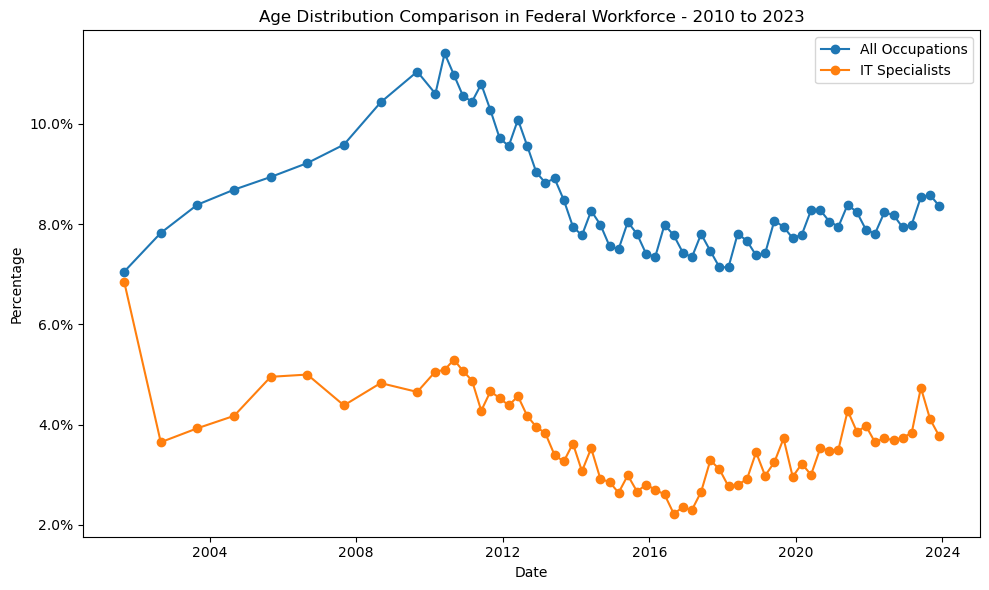

In [152]:
# Make line plot of 20-24 + 25-29 of IT vs all occupations

# Create a DataFrame to store the results
df_age = pd.DataFrame()


# List to store DataFrames to concatenate later
frames = []

for date, counts in age_counts.items():
    if counts['All Occupations'].shape[0] != 0 :
        # Create a DataFrame for the current counts and select the relevant rows
        df_temp = pd.DataFrame(counts).loc[['20-24', '25-29']]
        df_temp['Date'] = date
    
        # Append the temporary DataFrame to the list
        frames.append(df_temp)

# Concatenate all DataFrames in the list
df_age = pd.concat(frames)

# Reset the index
df_age.reset_index(inplace=True)

# Rename the columns
df_age.columns = ['Age','All Occupations', 'IT Specialists',  'Date']

# Convert the date to datetime
df_age['Date'] = pd.to_datetime(df_age['Date'], format='%Y%m')

# Create new row for 20-29 by date
df_age = df_age.groupby('Date').sum().reset_index()

# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lines
ax.plot(df_age['Date'], df_age['All Occupations'], label='All Occupations', marker='o')
ax.plot(df_age['Date'], df_age['IT Specialists'], label='IT Specialists', marker='o')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
ax.set_title('Age Distribution Comparison in Federal Workforce - 2010 to 2023')
ax.legend()

# Format y axis to  be percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()



In [151]:
df_age

,Age,All Occupations,IT Specialists,Date
0,20-24,3.122790,0.813512,2010-03-01
1,25-29,7.478779,4.245453,2010-03-01
2,20-24,2.829196,0.775961,2011-03-01
3,25-29,7.613323,4.102003,2011-03-01
4,20-24,2.242006,0.594534,2012-03-01
...,...,...,...,...
125,25-29,5.848886,2.961774,2021-12-01
126,20-24,2.067540,0.785695,2022-12-01
127,25-29,5.865916,2.955839,2022-12-01
128,20-24,2.276894,0.912170,2023-12-01
